In [142]:
import numpy as np
import pandas as pd

# Fermat's Little Theorem

## Main statement

If p is prime => for any integer a: a^p = a mod p.

In [143]:
a = np.arange(1,25)
p = 3
df = pd.DataFrame(a, columns=["a"])

In [144]:
df["mod"] = df["a"] % 3
df["pow"] = pow(df["a"], 3)
df["pow_mod"] = df["pow"] % 3

In [145]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
a,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
mod,1,2,0,1,2,0,1,2,0,1,...,0,1,2,0,1,2,0,1,2,0
pow,1,8,27,64,125,216,343,512,729,1000,...,3375,4096,4913,5832,6859,8000,9261,10648,12167,13824
pow_mod,1,2,0,1,2,0,1,2,0,1,...,0,1,2,0,1,2,0,1,2,0


In [146]:
df["mod"].equals(df["pow_mod"])

True

<AxesSubplot:>

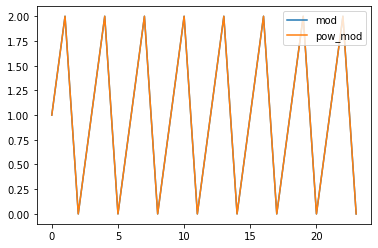

In [147]:
df[["mod", "pow_mod"]].plot()

## Equivalent statement

If p is prime => for any integer a, a mod p != 0: a^(p-1) = 1 mod p.

In [148]:
a = np.arange(1,25)
p = 3
df = pd.DataFrame(a, columns=["a"])

In [149]:
df["not_divisor"] = df["a"] % 3 != 0
df["pow_decr"] = pow(df["a"], 3-1)
df["pow_decr_mod"] = df["pow_decr"] % 3

In [150]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
a,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
not_divisor,True,True,False,True,True,False,True,True,False,True,...,False,True,True,False,True,True,False,True,True,False
pow_decr,1,4,9,16,25,36,49,64,81,100,...,225,256,289,324,361,400,441,484,529,576
pow_decr_mod,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,1,1,0,1,1,0


In [151]:
bools = {1: True, 0: False}
df["pow_decr_mod"].replace(bools).equals(df["not_divisor"])

True

<AxesSubplot:>

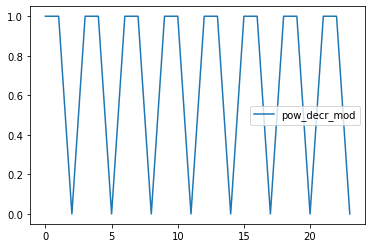

In [152]:
df[["pow_decr_mod"]].plot()